In [1]:
# read in the targets. 
import sys,os
%matplotlib inline  
import matplotlib
import numpy as np
import random 
import matplotlib.pyplot as plt
import tensorflow as tf

In [37]:
# Follows pople JCP 89 5777
def F0(t): 
    t2 = tf.sqrt(t)+1e-15
    return 1.772453850905516*tf.erf(t2)/(2.*t2)
def KAB(z1,z2,R1,R2):
    """
    Gaussian Product Rule. 
    """
    r1mr2=R1-R2
    return 1.414213562373095*(4.182513398379599/(z1+z2))*tf.exp(-(z1*z2)/(z1+z2)*tf.reduce_sum(r1mr2*r1mr2))
def SSSS(A,B,C,D,a1,a2,a3,a4): 
    zeta = a1+a2
    P = (a1*A+a2*B)/zeta
    eta = a3+a4
    Q = (a3*C+a4*D)/eta
    PmQ = P-Q
    AmB = A-B
    CmD = C-D
    T = zeta*eta/(zeta + eta)*tf.reduce_sum(PmQ*PmQ)
    #W = (zeta*P+eta*Q)/(zeta+eta)
    return KAB(a1,a2,A,B)*KAB(a3,a4,C,D)*F0(T)/tf.sqrt(zeta+eta)

In [43]:
def ssss(R): 
    A = tf.Variable([0.,0.,0.], dtype = tf.float64)
    B = tf.Variable([0.,0.,0.], dtype = tf.float64)
    C = tf.Variable([R,0.,0.], dtype = tf.float64)
    D = tf.Variable([R,0.,0.], dtype = tf.float64)
    a1 = tf.Variable(1.0, dtype = tf.float64)
    a2 = tf.Variable(1.0, dtype = tf.float64)
    a3 = tf.Variable(1.0, dtype = tf.float64)
    a4 = tf.Variable(1.0, dtype = tf.float64)
    config = tf.ConfigProto(inter_op_parallelism_threads=0, intra_op_parallelism_threads=0)
    with tf.Session(config=config) as sess :
        sess.run(tf.global_variables_initializer())
        #sess.run([SSSS(A,B,C,D,a1,a2,a3,a4)])
        return sess.run([tf.gradients(SSSS(A,B,C,D,a1,a2,a3,a4),A)])

In [44]:
ssss(1.0)

[[array([ 0.82862975, -0.        , -0.        ])]]

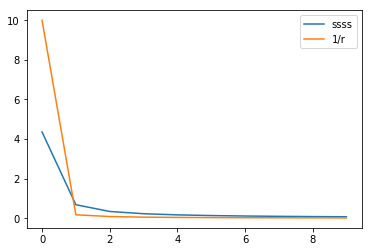

In [42]:
plt.plot([ssss(r) for r in np.linspace(0.1,50.0,10)],label="ssss")
plt.plot([1.0/(r) for r in np.linspace(0.1,50.0,10)],label="1/r")
plt.legend()